<a href="https://colab.research.google.com/github/marina554/accounting-practice/blob/main/Depreciation_Simulation_with_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


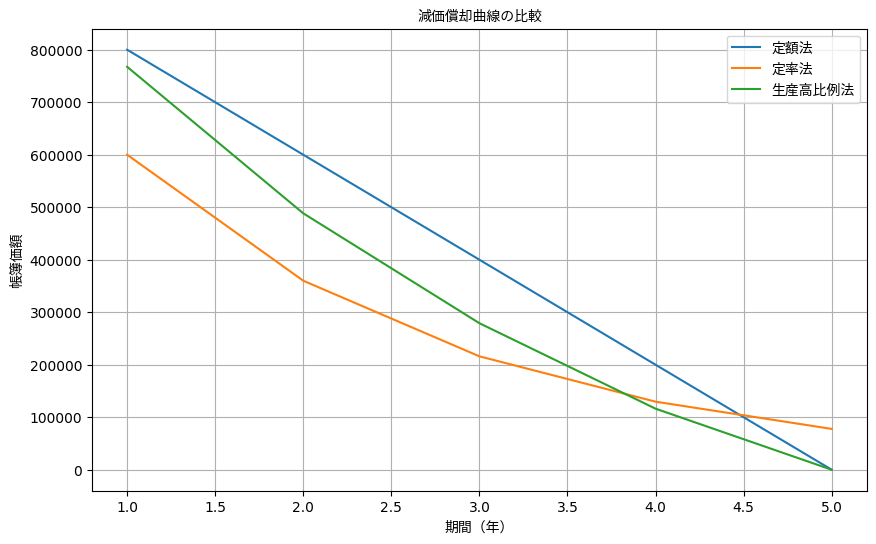

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ================================
# 1. フォント設定
# ================================
FONT_PATH = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
JP_FONT = fm.FontProperties(fname=FONT_PATH)

!apt-get -y install fonts-noto-cjk

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)





# ================================
# 2. パラメータ設定（ユーザーが変更する領域）
# ================================
COST = 1_000_000                # 取得原価
LIFE = 5                         # 耐用年数（年）
DECLINING_RATE = 0.4             # 定率法の償却率
PRODUCTION_UNITS = np.array([100, 120, 90, 70, 50])  # 生産高（年ごと）

# ================================
# 3. 減価償却ロジック
# ================================

def depreciation_straight_line(cost, life):
    """定額法の毎年の帳簿価額"""
    annual_dep = cost / life
    book_values = cost - np.cumsum(np.full(life, annual_dep))
    return book_values

def depreciation_declining_balance(cost, rate, life):
    """定率法の毎年の帳簿価額"""
    values = []
    current = cost
    for _ in range(life):
        current *= (1 - rate)
        values.append(current)
    return np.array(values)

def depreciation_units_of_production(cost, production_units):
    """生産高比例法の毎年の帳簿価額"""
    total_units = production_units.sum()
    dep_per_year = cost * (production_units / total_units)
    book_values = cost - np.cumsum(dep_per_year)
    return book_values

# --- 実行 ---
book_value_straight = depreciation_straight_line(COST, LIFE)
book_value_declining = depreciation_declining_balance(COST, DECLINING_RATE, LIFE)
book_value_units = depreciation_units_of_production(COST, PRODUCTION_UNITS)

# ================================
# 4. グラフ描画
# ================================
years = np.arange(1, LIFE + 1)

plt.figure(figsize=(10, 6))

plt.plot(years, book_value_straight, label="定額法")
plt.plot(years, book_value_declining, label="定率法")
plt.plot(years, book_value_units, label="生産高比例法")

plt.title("減価償却曲線の比較", fontproperties=JP_FONT)
plt.xlabel("期間（年）", fontproperties=JP_FONT)
plt.ylabel("帳簿価額", fontproperties=JP_FONT)

plt.grid(True)
plt.legend(prop=JP_FONT)
plt.show()